In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from IPython.display import Image, display
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import warnings
import copy
warnings.filterwarnings('ignore')
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

sns.set(style='white', context='notebook', palette='deep')

Populating the interactive namespace from numpy and matplotlib


In [63]:
l1 = pd.read_csv('letters.csv')
l2 = pd.read_csv('letters2.csv')
l3 = pd.read_csv('letters3.csv')
data = pd.concat([l1, l2, l3], ignore_index=True)
data = data.drop(['background', 'letter'], axis = 1)
data = data.drop(data.loc[data['file'] == '01_227.png'].index)
data = data.drop(data.loc[data['file'] == '08_75.png'].index)
data = data.drop(data.loc[data['file'] == '08_69.png'].index)
print(data.isnull().sum().max())

0


In [64]:
import os
from os.path import join
image_dir = r'C:\Users\Dota2\letters'
paths = [join(image_dir,filename) for filename in data['file']]

In [65]:
image_size = 32

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

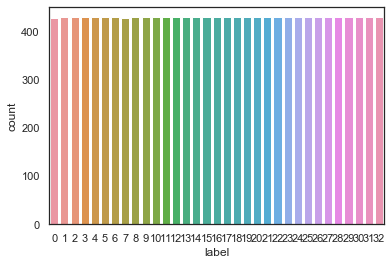

In [66]:
X_train = read_and_prep_images(paths)
Y_train = data['label']
Y_train = Y_train - 1
del data
uniq = sns.countplot(Y_train)

In [7]:
X_train = X_train / 255.0

In [8]:
Y_train = to_categorical(Y_train)

In [9]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed, shuffle=True)

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(33, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
epochs = 30
batch_size = 86

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False, 
        vertical_flip=False)


datagen.fit(X_train)

In [15]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 91s - loss: 3.3594 - accuracy: 0.0661 - val_loss: 2.9125 - val_accuracy: 0.2037
Epoch 2/30


C:\Users\Dota2\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 90s - loss: 2.8336 - accuracy: 0.2028 - val_loss: 2.1641 - val_accuracy: 0.3918
Epoch 3/30
 - 85s - loss: 2.2934 - accuracy: 0.3441 - val_loss: 1.4928 - val_accuracy: 0.5701
Epoch 4/30
 - 86s - loss: 1.9092 - accuracy: 0.4413 - val_loss: 1.0274 - val_accuracy: 0.7343
Epoch 5/30
 - 81s - loss: 1.5849 - accuracy: 0.5401 - val_loss: 0.8077 - val_accuracy: 0.7745
Epoch 6/30
 - 85s - loss: 1.3255 - accuracy: 0.6098 - val_loss: 0.9091 - val_accuracy: 0.7491
Epoch 7/30
 - 80s - loss: 1.1375 - accuracy: 0.6624 - val_loss: 0.5482 - val_accuracy: 0.8428
Epoch 8/30
 - 82s - loss: 1.0078 - accuracy: 0.6974 - val_loss: 0.4280 - val_accuracy: 0.8746
Epoch 9/30
 - 89s - loss: 0.9047 - accuracy: 0.7292 - val_loss: 0.4314 - val_accuracy: 0.8717
Epoch 10/30
 - 95s - loss: 0.8322 - accuracy: 0.7470 - val_loss: 0.3406 - val_accuracy: 0.9049
Epoch 11/30
 - 87s - loss: 0.7474 - accuracy: 0.7719 - val_loss: 0.3197 - val_accuracy: 0.9049
Epoch 12/30
 - 86s - loss: 0.7102 - accuracy: 0.7869 - val_loss: 0.30

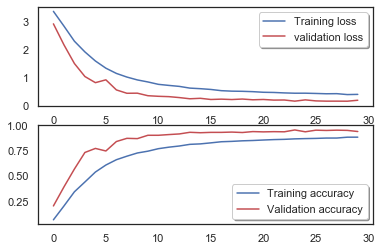

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

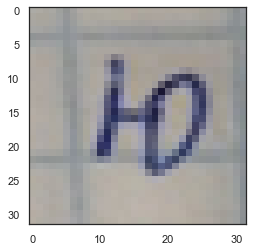

Буква на картинке является:
Буквой ю с вероятностью 100.00%
Буквой п с вероятностью 0.00%
Буквой т с вероятностью 0.00%


In [30]:
#Для предсказания единственной буквы
paths = [r'C:\Users\Dota2\testing\a.png']
test = read_and_prep_images(paths)

test = test / 255.0
results = model.predict(test)
results = results * 100
results = results[0]
letts = ['а', 'б','в', 'г','д', 'е','ё', 'ж','з', 'и','й', 'к','л', 'м','н', 'о','п', 'р','с', 'т','у', 'ф','х', 'ц','ч', 'ш',
        'щ', 'ъ','ы', 'ь','э', 'ю','я']
vec_list = []
for i in range(len(results)):
    vec_list.append([results[i], letts[i]])
vec_list.sort(key=lambda x: x[0], reverse = True)
img=mpimg.imread(paths[0], 0)
imgplot = plt.imshow(img)
plt.show()

print('Буква на картинке является:')
print('Буквой {} с вероятностью {}%'.format(vec_list[0][1],'%.2f' % vec_list[0][0]))
print('Буквой {} с вероятностью {}%'.format(vec_list[1][1],'%.2f' % vec_list[1][0]))
print('Буквой {} с вероятностью {}%'.format(vec_list[2][1],'%.2f' % vec_list[2][0]))

In [38]:
#Для предсказания большего числа букв
image_dir = r'C:\Users\Dota2\testing'
files = ['test.png', 'a.png'] #preferably in csv
paths = [join(image_dir,filename) for filename in files]
test = read_and_prep_images(paths)
test = test / 255.0
results = model.predict(test)
results = results * 100
results = np.argmax(results,axis = 1)
alph = { 0:'а', 1:'б', 2:'в', 3:'г', 4:'д', 5:'е', 6:'ё', 7:'ж', 8:'з', 9:'и', 10:'й', 11:'к', 12:'л', 13:'м', 14:'н',
        15:'о', 16:'п', 17:'р', 18:'с',19:'т', 20:'у', 21:'ф', 22:'х', 23:'ц', 24:'ч', 25:'ш', 26:'щ', 27:'ъ', 28:'ы',
        29:'ь', 30:'э', 31:'ю', 32:'я'
        }
final = []
for i in range(len(results)):
    final.append(alph.get(results[i]))

In [57]:
final

['а', 'ю']

In [59]:
import pickle
with open('lettermodel.pkl', 'wb') as output:
       pickle.dump(model, output)